# **1. INTRODUCTION**

This project focuses on predicting car prices using a RandomForestRegressor model. The workflow begins with data inspection, cleaning, and visualization to understand feature distributions and correlations. After preprocessing and applying log transformation to reduce skewness, label encoding is used to convert categorical features for modeling. Then split, and the model is trained and evaluated based on mean squared error, mean absolute error, and R-squared metrics. Results indicate a reasonable fit, with potential improvements through hyperparameter tuning and additional feature engineering.

# **2. DATA OVERVIEW**


 This analysis uses a dataset containing 42,089 records of car listings with 13 attributes, including car brand, model, price, city, fuel, transmission, drive, mileage, engine hp, and engine capacity. The goal is to analyze and predict car prices based on these features.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/car_data.csv')
df

,Unnamed: 0,car_brand,car_model,car_price,car_city,car_fuel,car_transmission,car_drive,car_mileage,car_country,car_engine_capacity,car_engine_hp,car_age
0,0,Ford,Focus,550000,Astrakhan,gasoline,manual,FWD,300000,USA,1.8,125,14
1,1,Mercedes-Benz,GLA-Class,1820000,Astrakhan,gasoline,robot,FWD,88000,DE,1.6,156,10
2,2,Haval,F7,2600000,Astrakhan,gasoline,robot,4WD,19000,CN,1.5,150,2
3,3,Toyota,Camry,4200000,Astrakhan,gasoline,automatic,FWD,30000,JP,3.5,249,2
4,4,OMODA,C5,2125000,Astrakhan,gasoline,CVT,FWD,18824,CN,1.5,147,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42084,42084,Isuzu,Bighorn,450000,Yakutsk,diesel,automatic,4WD,183212,JP,3.1,125,30
42085,42085,Toyota,Corolla Axio,650000,Yakutsk,gasoline,CVT,FWD,110000,JP,1.5,110,13
42086,42086,Daihatsu,Be-Go,1350000,Yakutsk,gasoline,automatic,4WD,153000,JP,1.5,109,13
42087,42087,Mazda,Tribute,550000,Yakutsk,gasoline,automatic,4WD,190000,JP,2.0,129,23


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42089 entries, 0 to 42088
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           42089 non-null  int64  
 1   car_brand            42089 non-null  object 
 2   car_model            42089 non-null  object 
 3   car_price            42089 non-null  int64  
 4   car_city             42089 non-null  object 
 5   car_fuel             42089 non-null  object 
 6   car_transmission     42089 non-null  object 
 7   car_drive            42089 non-null  object 
 8   car_mileage          42089 non-null  int64  
 9   car_country          42089 non-null  object 
 10  car_engine_capacity  42089 non-null  float64
 11  car_engine_hp        42089 non-null  int64  
 12  car_age              42089 non-null  int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 4.2+ MB


In [ ]:
df.describe()

,Unnamed: 0,car_price,car_mileage,car_engine_capacity,car_engine_hp,car_age
count,42089.000000,4.208900e+04,42089.000000,42089.000000,42089.000000,42089.000000
mean,21044.000000,1.712717e+06,144846.070517,1.977084,147.329373,11.697261
std,12150.192077,1.976693e+06,92460.616254,0.782458,69.438003,7.379045
min,0.000000,7.000000e+03,1.000000,0.600000,30.000000,0.000000
25%,10522.000000,7.300000e+05,76500.000000,1.600000,105.000000,6.000000
50%,21044.000000,1.250000e+06,134500.000000,1.700000,130.000000,11.000000
75%,31566.000000,2.024900e+06,200000.000000,2.000000,170.000000,16.000000
max,42088.000000,7.000000e+07,996658.000000,8.000000,1197.000000,84.000000


In [ ]:
df.columns

Index(['Unnamed: 0', 'car_brand', 'car_model', 'car_price', 'car_city',
       'car_fuel', 'car_transmission', 'car_drive', 'car_mileage',
       'car_country', 'car_engine_capacity', 'car_engine_hp', 'car_age'],
      dtype='object')

In [ ]:
df.shape

(42089, 13)

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
car_brand,0
car_model,0
car_price,0
car_city,0
car_fuel,0
car_transmission,0
car_drive,0
car_mileage,0
car_country,0


In [ ]:
df.duplicated().sum()

0

# **3. DATA CLEANING and PREPARATION**

Column Removal: The Unnamed: 0 column (likely an index from the source) is removed with df.drop(columns=['Unnamed: 0'], inplace=True) as it doesn’t provide useful information for analysis.

In [ ]:
df.drop(columns=['Unnamed: 0'],inplace=True)

# **4. VISUALIZATION**

- Distribution of Car Prices: A histogram (sns.histplot(df['car_price'], kde=True)) visualizes the distribution of car prices, providing insights into whether the data is normally distributed or skewed.


- This helps by doing this df.hist(figsize=(10,10)) generates histograms for each numerical column in the DataFrame df within a grid layout. By setting figsize=(10,10), it ensures that the figure dimensions are 10 inches by 10 inches, making each subplot adequately sized for readability. This approach provides a quick overview of the distributions for each numerical feature, helping identify patterns such as skewness, central tendency, and spread, which are useful for data exploration and pre-processing.

<Axes: xlabel='car_price', ylabel='Count'>

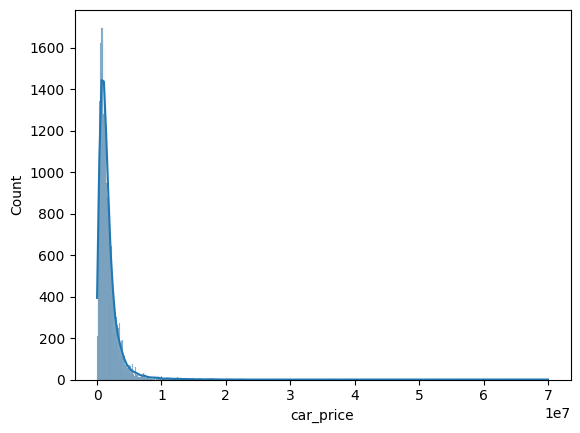

In [ ]:
sns.histplot(df['car_price'],kde=True)

array([[<Axes: title={'center': 'car_price'}>,
        <Axes: title={'center': 'car_mileage'}>],
       [<Axes: title={'center': 'car_engine_capacity'}>,
        <Axes: title={'center': 'car_engine_hp'}>],
       [<Axes: title={'center': 'car_age'}>, <Axes: >]], dtype=object)

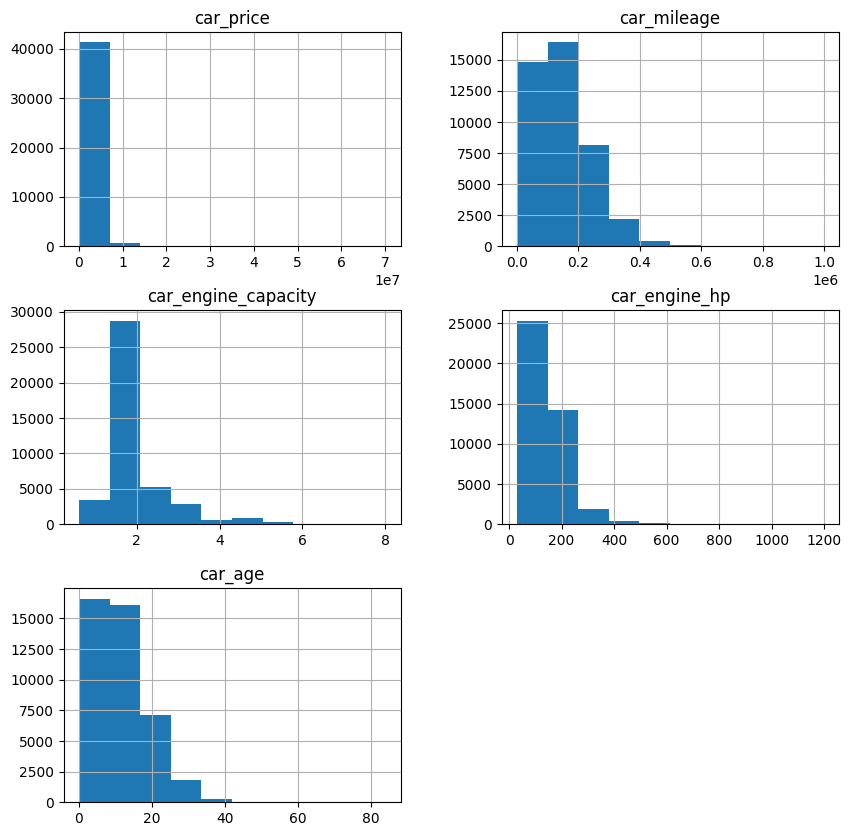

In [ ]:
df.hist(figsize=(10,10))

# **5. DATA ENCODING**

- Label Encoding: Categorical features (like car brand, model, fuel type, etc..) are converted into numeric values using LabelEncoder to prepare them for modeling. This transformation is necessary as machine learning models typically handle numerical values better than text.

- Also add histogram of the data after encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
df['car_brand']=le.fit_transform(df['car_brand'])
df['car_model']=le.fit_transform(df['car_model'])
df['car_city']=le.fit_transform(df['car_city'])
df['car_fuel']=le.fit_transform(df['car_fuel'])
df['car_transmission']=le.fit_transform(df['car_transmission'])
df['car_drive']=le.fit_transform(df['car_drive'])
df['car_country']=le.fit_transform(df['car_country'])
df

,car_brand,car_model,car_price,car_city,car_fuel,car_transmission,car_drive,car_mileage,car_country,car_engine_capacity,car_engine_hp,car_age
0,29,498,550000,0,1,2,1,300000,14,1.8,125,14
1,71,524,1820000,0,1,3,1,88000,2,1.6,156,10
2,39,472,2600000,0,1,3,0,19000,0,1.5,150,2
3,102,280,4200000,0,1,1,1,30000,7,3.5,249,2
4,76,244,2125000,0,1,0,1,18824,0,1.5,147,2
...,...,...,...,...,...,...,...,...,...,...,...,...
42084,48,204,450000,22,0,1,0,183212,7,3.1,125,30
42085,102,345,650000,22,1,0,1,110000,7,1.5,110,13
42086,20,192,1350000,22,1,1,0,153000,7,1.5,109,13
42087,70,1212,550000,22,1,1,0,190000,7,2.0,129,23


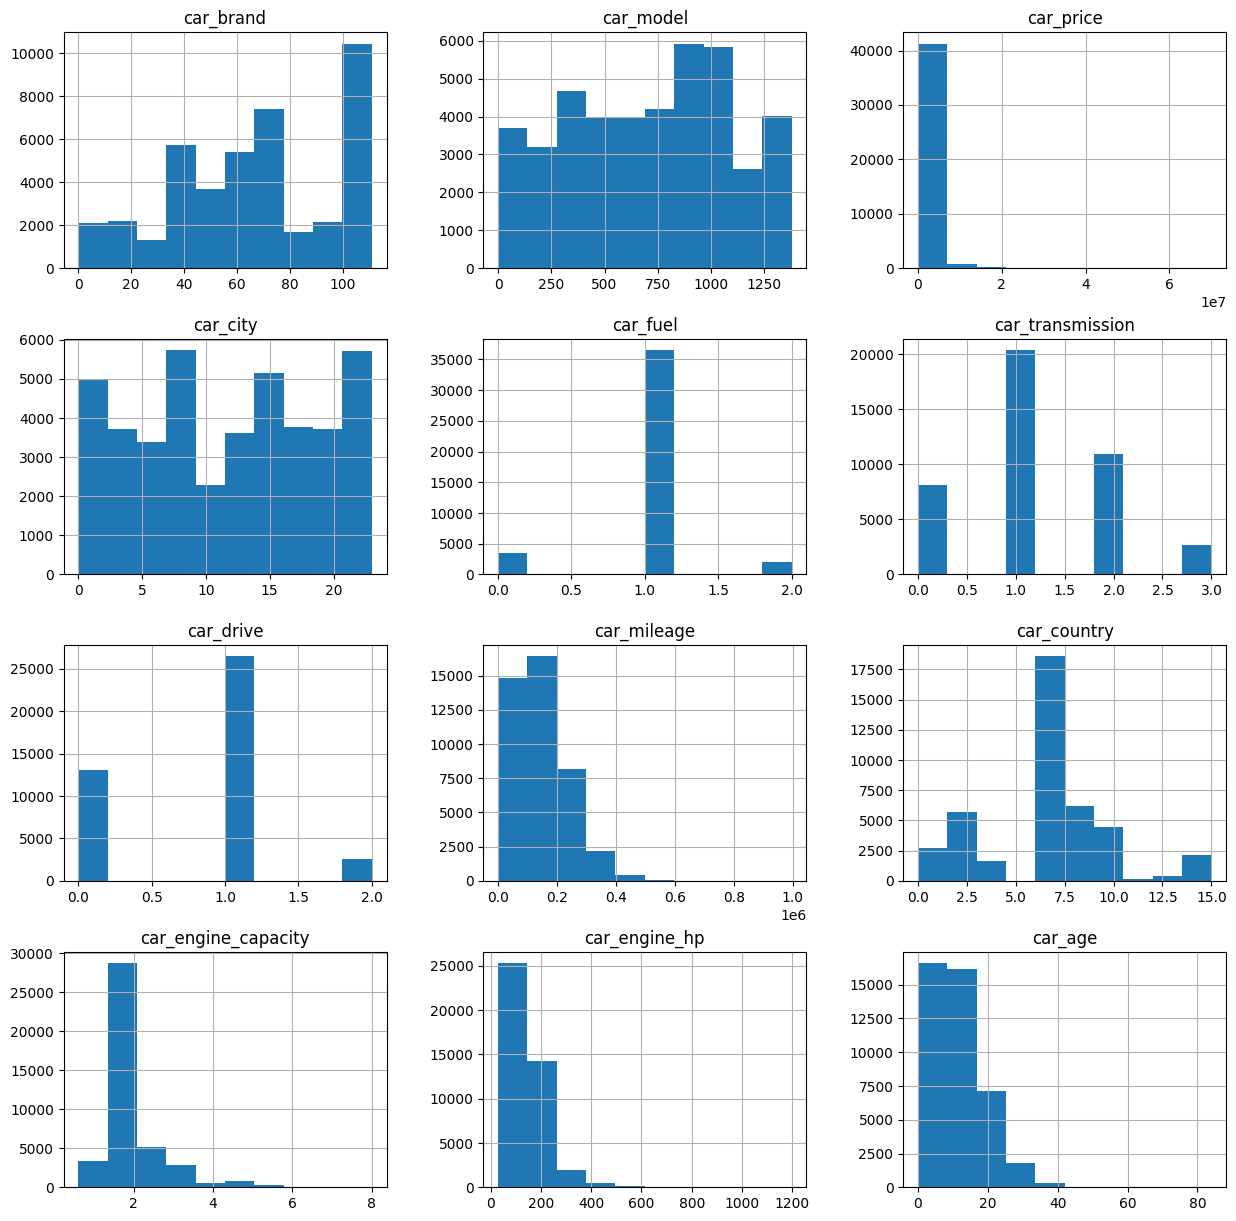

In [ ]:
df.hist(figsize=(15,15))
plt.show()

# **6. CORRELATION ANALYSIS**

- Using sns.heatmap, a correlation matrix visualizes relationships between variables, helping identify features that are highly correlated with the target variable (car price).

- In this analysis, several features, such as car_brand, car_model, car_city, car_fuel, car_transmission, and car_engine_capacity, were removed because they had little to no correlation with the target variable, car_price. Including such low-correlation features can introduce noise, increase the model's complexity, and slow down training, without significantly improving predictive accuracy. By focusing on more relevant, highly correlated features, we aim to simplify the model, reduce the risk of overfitting, and enhance performance and interpretability.

 - car_engine_capacity and car_engine_hp both are independent feature and also highly correlated each other, so we remove on of that

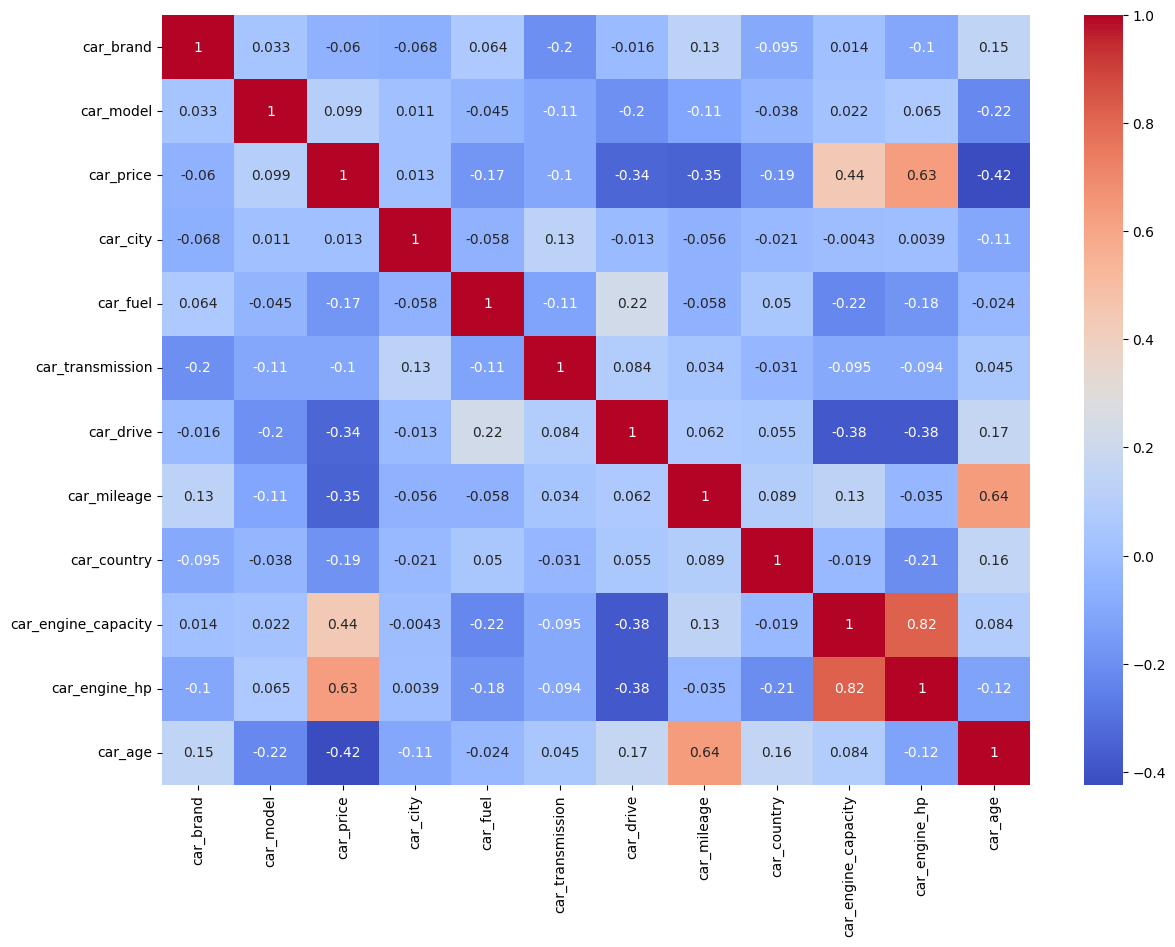

In [ ]:
corr_matrix=df.corr()
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.show()

In [ ]:
corr_matrix

,car_brand,car_model,car_price,car_city,car_fuel,car_transmission,car_drive,car_mileage,car_country,car_engine_capacity,car_engine_hp,car_age
car_brand,1.000000,0.032998,-0.059802,-0.067648,0.064121,-0.201154,-0.015716,0.129816,-0.095416,0.013930,-0.104286,0.146238
car_model,0.032998,1.000000,0.098695,0.011056,-0.045199,-0.106932,-0.195094,-0.110373,-0.038294,0.022333,0.064670,-0.223003
car_price,-0.059802,0.098695,1.000000,0.012983,-0.172521,-0.102614,-0.336487,-0.349092,-0.187577,0.438152,0.627471,-0.424384
car_city,-0.067648,0.011056,0.012983,1.000000,-0.058191,0.126841,-0.013339,-0.055837,-0.021214,-0.004339,0.003933,-0.105688
car_fuel,0.064121,-0.045199,-0.172521,-0.058191,1.000000,-0.114941,0.222982,-0.057858,0.050182,-0.224795,-0.175325,-0.024408
car_transmission,-0.201154,-0.106932,-0.102614,0.126841,-0.114941,1.000000,0.083824,0.033695,-0.030534,-0.094892,-0.094380,0.045040
car_drive,-0.015716,-0.195094,-0.336487,-0.013339,0.222982,0.083824,1.000000,0.062410,0.055374,-0.381958,-0.383147,0.169725
car_mileage,0.129816,-0.110373,-0.349092,-0.055837,-0.057858,0.033695,0.062410,1.000000,0.088661,0.134040,-0.034815,0.636582
car_country,-0.095416,-0.038294,-0.187577,-0.021214,0.050182,-0.030534,0.055374,0.088661,1.000000,-0.018924,-0.205650,0.156590
car_engine_capacity,0.013930,0.022333,0.438152,-0.004339,-0.224795,-0.094892,-0.381958,0.134040,-0.018924,1.000000,0.818394,0.084129


In [ ]:
cor=df.corr()['car_price']
cor

,car_price
car_brand,-0.059802
car_model,0.098695
car_price,1.000000
car_city,0.012983
car_fuel,-0.172521
car_transmission,-0.102614
car_drive,-0.336487
car_mileage,-0.349092
car_country,-0.187577
car_engine_capacity,0.438152


In [ ]:
df.drop(['car_brand'],axis=1,inplace=True)
df.drop(['car_model'],axis=1,inplace=True)
df.drop(['car_city'],axis=1,inplace=True)
df.drop(['car_fuel'],axis=1,inplace=True)
df.drop(['car_transmission'],axis=1,inplace=True)
df.drop(['car_engine_capacity'],axis=1,inplace=True)

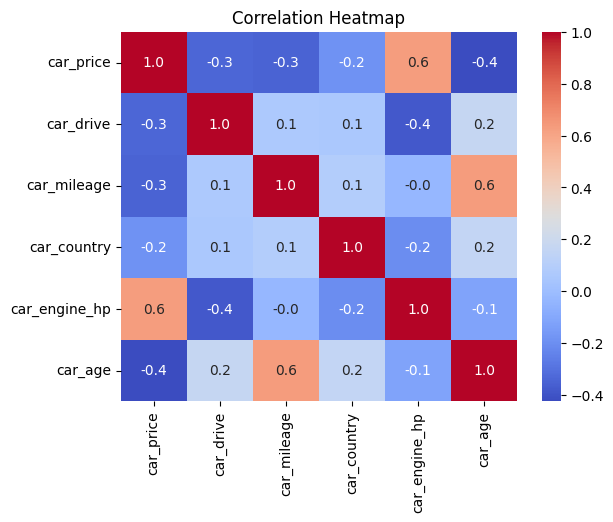

In [ ]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',robust=True,fmt='0.01f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
s=df.corr()['car_price']
s.sort_values(ascending=False)

,car_price
car_price,1.000000
car_engine_hp,0.627471
car_country,-0.187577
car_drive,-0.336487
car_mileage,-0.349092
car_age,-0.424384


# **7. OUTLIER DETECTION**

Box Plots for Skewed Data: To identify skewness in the data, sns.boxplot() was applied to observe data spread and identify potential outliers. Skewed distributions indicate the need for data transformation.

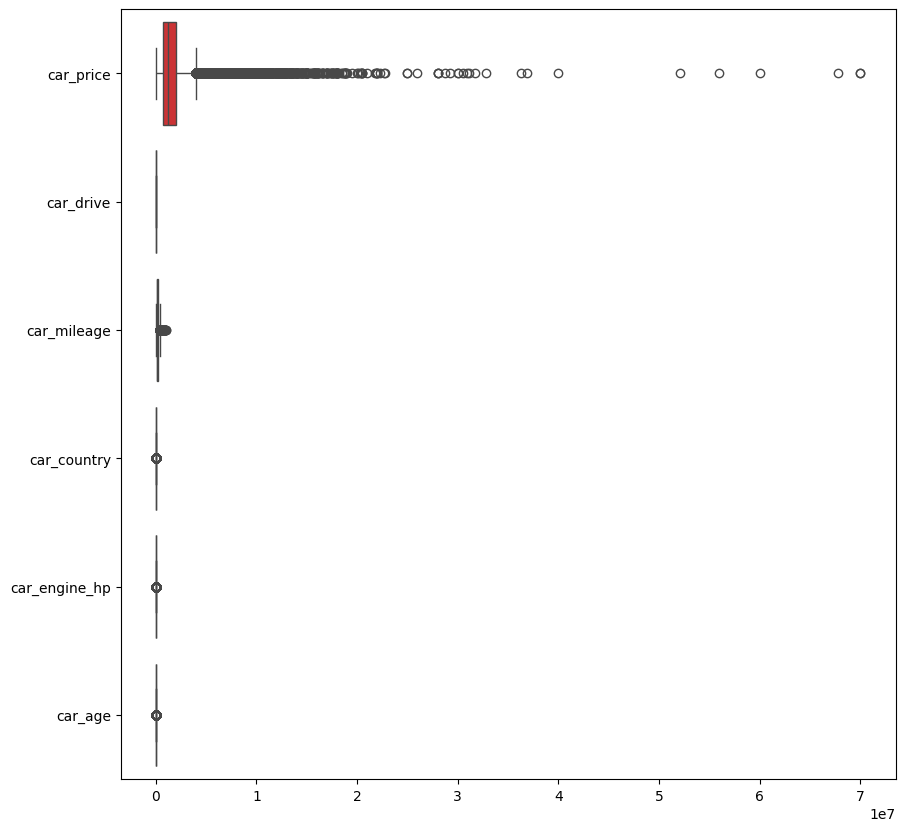

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(df,orient='h',palette='Set1')
plt.show()

# **8. SKEWNESS HANDLING**

skewness is handled by applying a log transformation to numerical features. Skewed data distributions can affect model performance, especially in algorithms sensitive to variance. Here’s a breakdown of the process:

1. Log Transformation:

The data is transformed using np.log(df + 1) to adjust all values by adding 1, preventing log(0) errors. This approach compresses larger values more than smaller ones, reducing skewness.

2. Visualization:

After the transformation, histograms of each log-transformed feature are plotted to verify distribution normalization.

3. Effectiveness:

The transformed features show a more symmetric distribution, potentially enhancing model performance and reducing bias.

-This skewness correction is essential for ensuring the data meets assumptions of normality, which benefits many machine learning models.

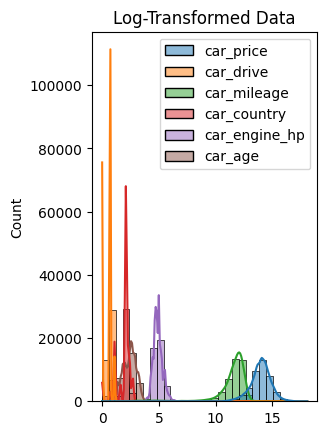

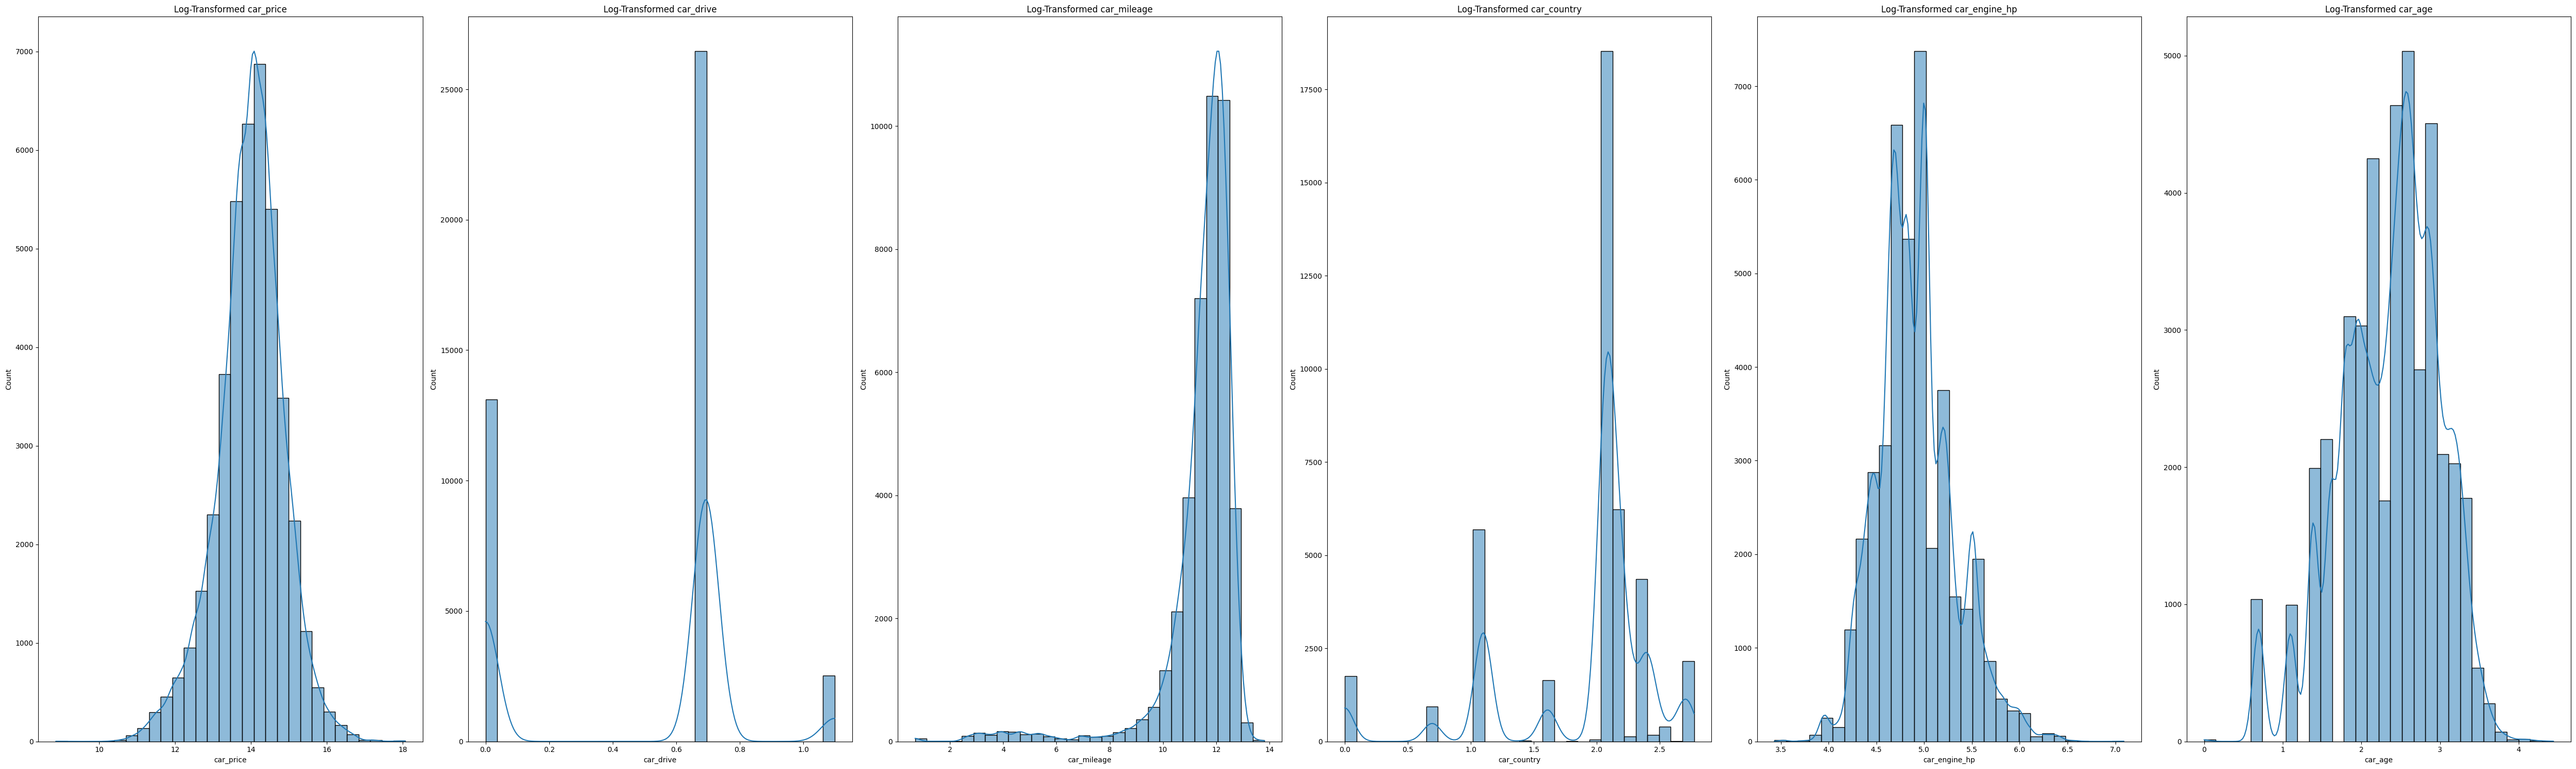

In [ ]:
#To handle skewness
import numpy as np
log_data = np.log(df + 1)  # Adding 1 to avoid log(0)

# Plotting log-transformed data distribution
plt.subplot(1,2,2)
sns.histplot(log_data, bins=30, kde=True)
plt.title("Log-Transformed Data")
plt.show()

# Assuming log_data is a DataFrame with multiple features
num_features = log_data.shape[1]  # Number of features
plt.figure(figsize=(50, 15))  # Adjust the figure size as needed

for i, column in enumerate(log_data.columns, 1):
    plt.subplot(1, num_features, i)  # Adjust layout for each feature
    sns.histplot(log_data[column], bins=30, kde=True)
    plt.title(f"Log-Transformed {column}")

plt.tight_layout()
plt.show()

# **9. OUTLIER HANDLING**

 outlier handling is performed using the Interquartile Range (IQR) method. Here’s a detailed breakdown of the process:

1. Calculating IQR:

The IQR is calculated as the difference between the third quartile (Q3) and the first quartile (Q1) of a feature, where IQR=Q3−Q1.

2. Defining Outlier Bounds:

Lower bound =
𝑄
1
−
1.5
×
IQR
Q1−1.5×IQR
Upper bound =
𝑄
3
+
1.5
×
IQR
Q3+1.5×IQR
Values outside these bounds are considered outliers.
3. Removing Outliers:

Using these bounds, data points are filtered to retain only those within the calculated range.

4. Example:

For car_price, the IQR method is applied to eliminate extreme values, reducing the influence of outliers on the model and leading to more stable predictions.
-
This approach is particularly useful for maintaining a dataset with a focus on typical values, ensuring that extreme values don’t skew model training.

In [ ]:
Q1=np.quantile(df,0.25)
Q2=np.quantile(df,0.50)
Q3=np.quantile(df,0.75)
Q1,Q2,Q3
IQR=Q3-Q1
IQR

129994.0

In [ ]:
def remove_outliers_iqr(df, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for the column
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for detecting outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out the outliers from the DataFrame
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered


df_no_outliers = remove_outliers_iqr(df,'car_price')

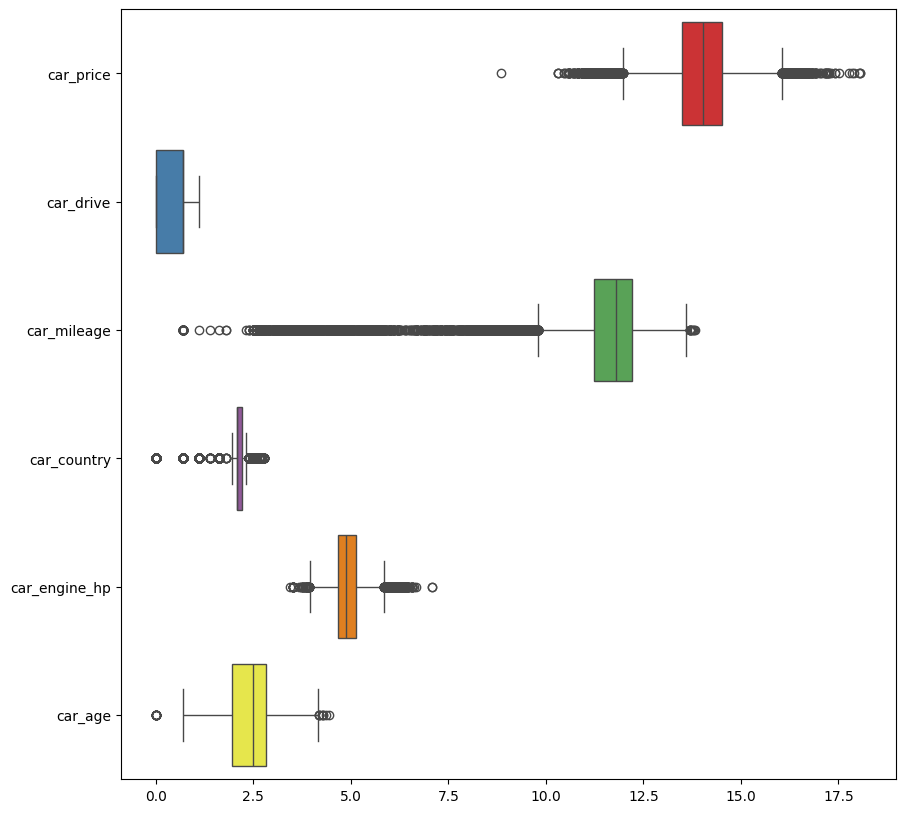

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(log_data,orient='h',palette='Set1')
plt.show()

In [ ]:
df_no_outliers.shape

(39237, 6)

In [ ]:
df=log_data

# **10. MODEL TRAINING and EVALUATION**

- Data Splitting: The data is split into training (80%) and testing sets (20%) to evaluate model performance. The split ensures the model can generalize to new, unseen data.

- Random Forest Regressor Model: The RandomForestRegressor is chosen and trained on the data due to its robustness and ability to handle complex datasets.

- Evaluation Metrics: The model is evaluated with Mean Squared Error (MSE), Mean Absolute Error (MAE), and R² Score:

    - MSE measures average squared errors, showing the quality of predictions.
    - MAE provides the average absolute difference between predictions and
      actual values.
    - R² Score indicates the proportion of variance in car prices explained by
      the model (0.9158 indicates a high level of accuracy).

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [ ]:
cor=df.corr()['car_price']
cor.sort_values(ascending=False)

,car_price
car_price,1.000000
car_engine_hp,0.654284
car_country,-0.256944
car_mileage,-0.347507
car_drive,-0.417673
car_age,-0.664865


In [ ]:
independent_feature=['car_mileage','car_age','car_drive','car_engine_hp','car_country']#independent feature
dependent_feature=['car_price']#dependent feature
x=df[independent_feature]
y=df[dependent_feature]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,#0.2 means 20% of data specified for testing set,and the other 80% for training set
                                               random_state=42)# to take the same data for training and testing set

print(x_train.shape)  # Prints the shape of x_train (rows, columns)
print(x_test.shape)   # Prints the shape of x_test
print(y_train.shape)  # Prints the shape of y_train
print(y_test.shape)   # Prints the shape of y_test

(33671, 5)
(8418, 5)
(33671, 1)
(8418, 1)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model=RandomForestRegressor()
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [ ]:
y_pred=model.predict(x_test)
y_pred

array([13.86505175, 12.92915382, 14.41359685, ..., 13.38601799,
       14.09443937, 14.08105963])

In [ ]:
mse=mean_squared_error(y_test,y_pred)#An indicator of average squared prediction error.
mae=mean_absolute_error(y_test,y_pred)#An indicator of average absolute prediction error
r2=r2_score(y_test,y_pred)#An indicator of the model’s fit quality.
print('mean squared error:',mse)
print('mean absolute error:',mae)
print('r2 score:',r2)

mean squared error: 0.07450570372397114
mean absolute error: 0.18505139207071167
r2 score: 0.9042623628233898


In [ ]:
df.head(5)

,car_price,car_drive,car_mileage,car_country,car_engine_hp,car_age
0,13.217675,0.693147,12.611541,2.708050,4.836282,2.708050
1,14.414348,0.693147,11.385103,1.098612,5.056246,2.397895
2,14.771022,0.000000,9.852247,0.000000,5.017280,1.098612
3,15.250595,0.693147,10.308986,2.079442,5.521461,1.098612
4,14.569283,0.693147,9.842941,0.000000,4.997212,1.098612


# **11. PRICE PREDICTION INTERFACE**



- **User Input**: Collects details about the car.
- **Prediction**: Feeds these inputs to a pre-trained model.
- **Output**: Displays the predicted price to the user

In [ ]:
car_drive=float(input('enter the car_drive:'))
car_mileage=float(input('enter the car_mileage:'))
car_country=float(input('enter the car_country:'))
car_engine_hp=float(input('enter the car_engine_hp:'))
car_age=float(input('enter the car_age:'))
user_input=np.array([[car_drive,car_mileage,car_country,car_engine_hp,car_age]])
predicted=model.predict(user_input)
print('predicted price:',predicted)

enter the car_drive:0.693147
enter the car_mileage:9.842941
enter the car_country:0.000000
enter the car_engine_hp:4.997212
enter the car_age:1.098612
predicted price: [13.06347353]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# **12. RESULTS and ANALYSIS**

Actual vs. Predicted Price Plot: The sns.regplot plot provides a visual comparison between actual and predicted prices, helping identify how well the model aligns with real data. A closer alignment between the points and the regression line indicates higher model accuracy.

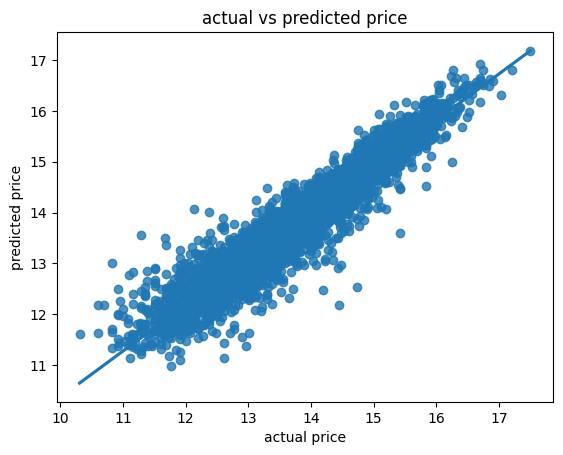

In [ ]:
sns.regplot(x=y_test,y=y_pred)
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title('actual vs predicted price')
plt.show()

# **13. CONCLUSION**

This analysis successfully explored, cleaned, and modeled car price data with over 42,000 records. Data preprocessing steps, including handling skewness with log transformations and outlier removal through the IQR method, improved data quality. Visualizations provided insights into feature distributions and relationships, guiding feature selection for model training. A Random Forest Regressor, trained on the processed data, achieved a high R² score of 0.92, indicating strong predictive accuracy. This model can now reliably predict car prices based on key vehicle attributes, making it a valuable tool for price estimation.

# **14. REFERENCES**

1. Used Cars Dataset by Austin Reese
2. Kaggle
3. ChatGPT
4. Gemini